In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [10]:
data = pd.read_csv("cardekho.csv")
data.head()


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [12]:
data.shape

(15411, 14)

In [13]:
data.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [14]:
data['fuel_type'].value_counts(normalize = True)*100

fuel_type
Petrol      49.594446
Diesel      48.140938
CNG          1.953150
LPG          0.285510
Electric     0.025955
Name: proportion, dtype: float64

In [15]:
data['fuel_type'].value_counts()

fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64

In [16]:
data['mileage'].mean()

np.float64(19.70115112581922)

<Axes: xlabel='mileage', ylabel='Density'>

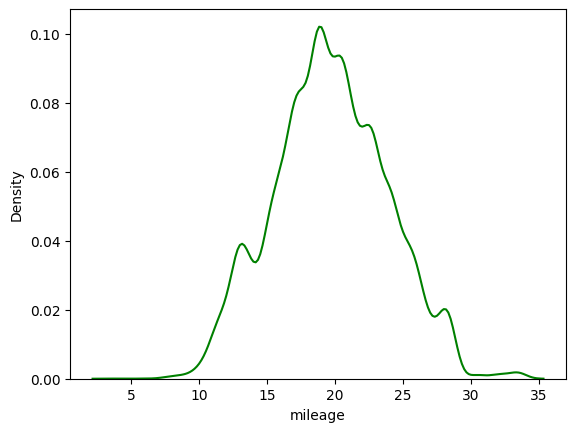

In [17]:
sns.kdeplot(x = data['mileage'],color = 'g')

<Axes: xlabel='seats', ylabel='Density'>

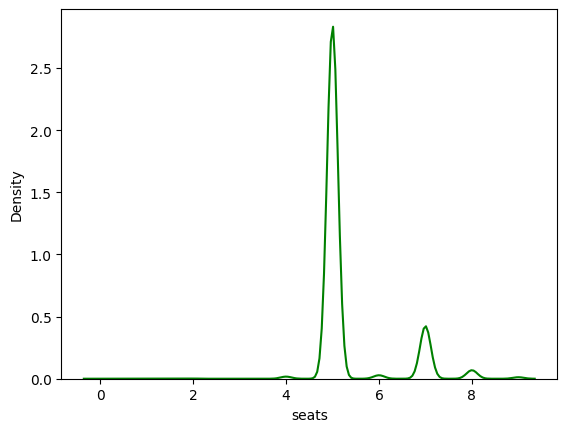

In [18]:
sns.kdeplot(x = data['seats'],color = 'g')

<Axes: xlabel='vehicle_age', ylabel='Density'>

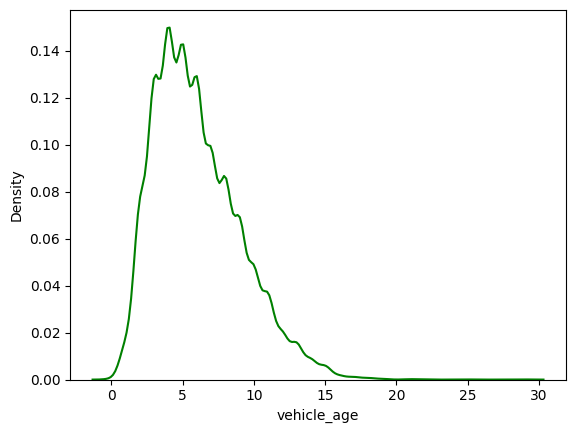

In [19]:
sns.kdeplot(x = data['vehicle_age'],color = 'g')

<Axes: xlabel='km_driven', ylabel='Density'>

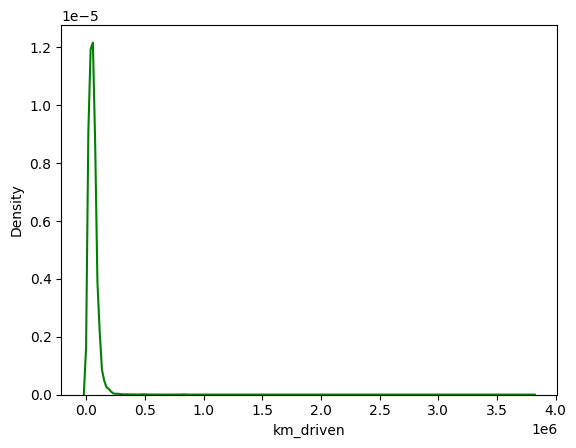

In [20]:
sns.kdeplot(x = data['km_driven'],color = 'g')

<Axes: xlabel='selling_price', ylabel='Density'>

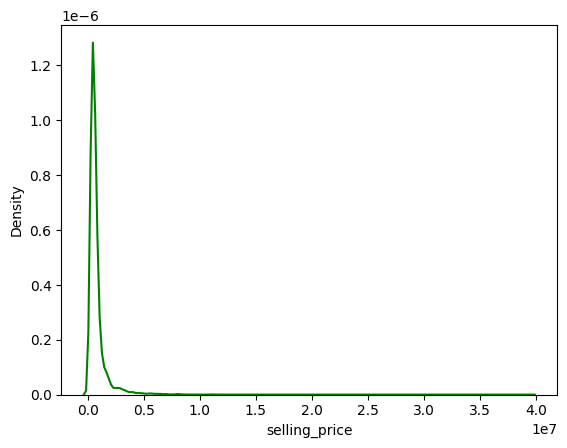

In [21]:
sns.kdeplot(x = data['selling_price'],color = 'g')

<Axes: xlabel='max_power', ylabel='Density'>

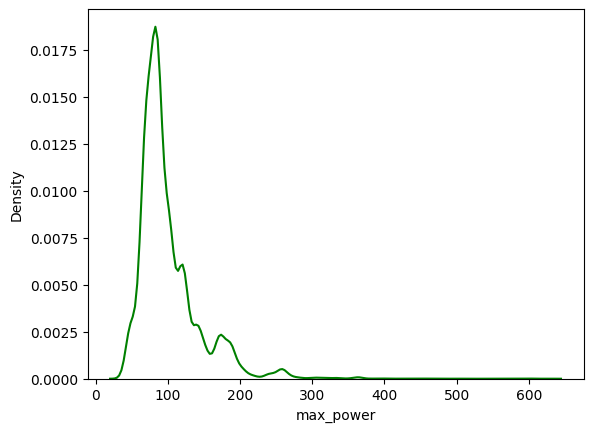

In [22]:
sns.kdeplot(x = data['max_power'],color = 'g')

<Axes: xlabel='engine', ylabel='Density'>

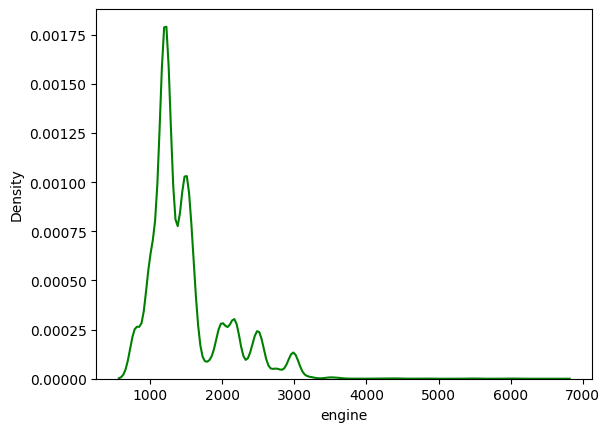

In [23]:
sns.kdeplot(x = data['engine'],color = 'g')

<Axes: xlabel='seller_type', ylabel='count'>

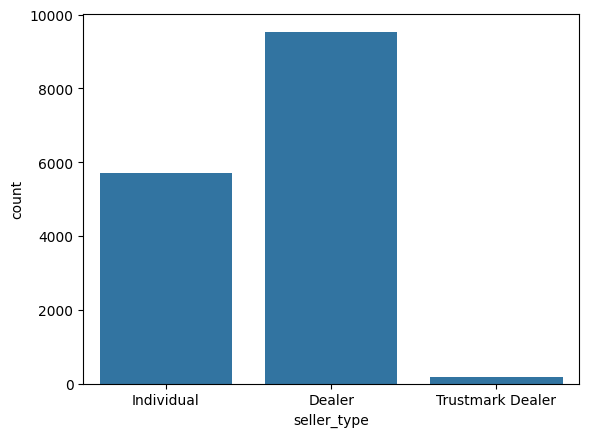

In [24]:
sns.countplot(x = data['seller_type'])

<Axes: xlabel='brand', ylabel='count'>

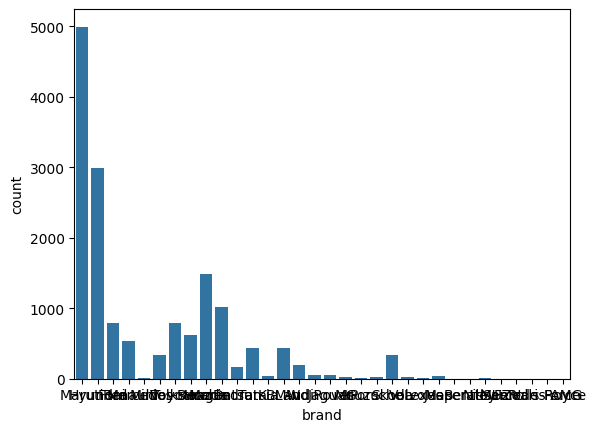

In [25]:
sns.countplot(x = data['brand'])

<Axes: xlabel='fuel_type', ylabel='count'>

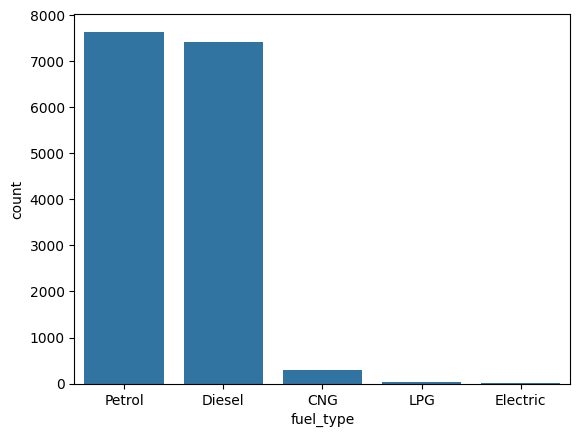

In [26]:
sns.countplot(x = data['fuel_type'])

<Axes: xlabel='transmission_type', ylabel='count'>

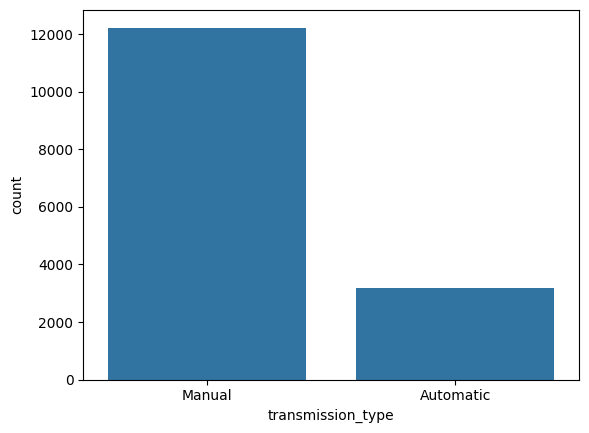

In [27]:
sns.countplot(x = data['transmission_type'])

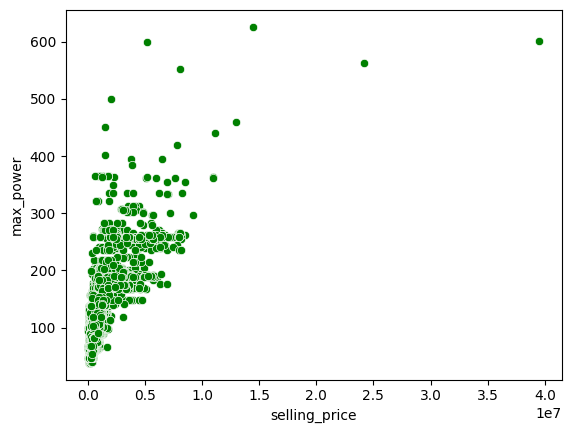

In [28]:

sns.scatterplot(data=data, x='selling_price', y='max_power', color='g')

# Show the plot
plt.show()


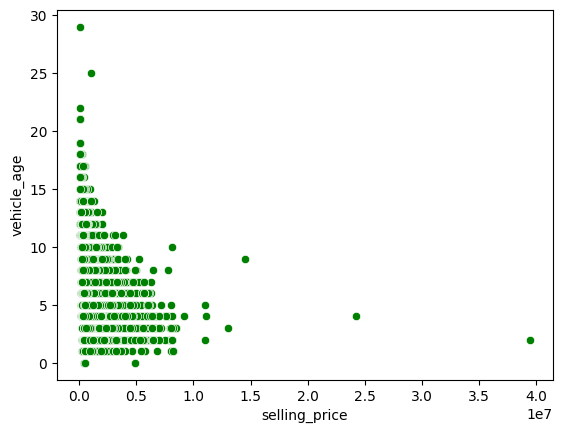

In [29]:

sns.scatterplot(data=data, x='selling_price', y='vehicle_age', color='g')

# Show the plot
plt.show()


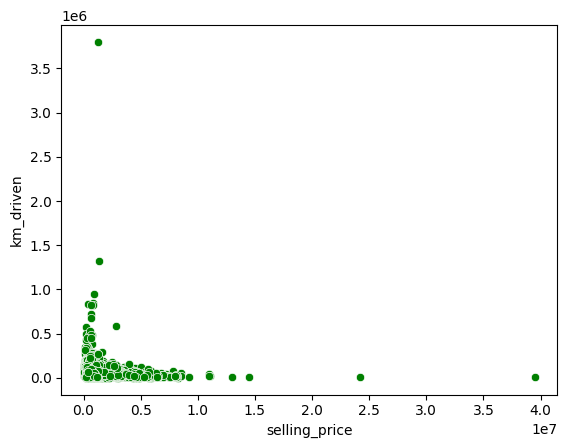

In [30]:

sns.scatterplot(data=data, x='selling_price', y='km_driven', color='g')

# Show the plot
plt.show()


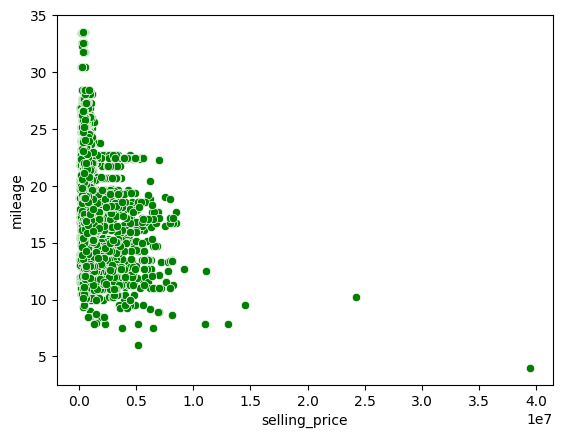

In [31]:

sns.scatterplot(data=data, x='selling_price', y='mileage', color='g')

# Show the plot
plt.show()


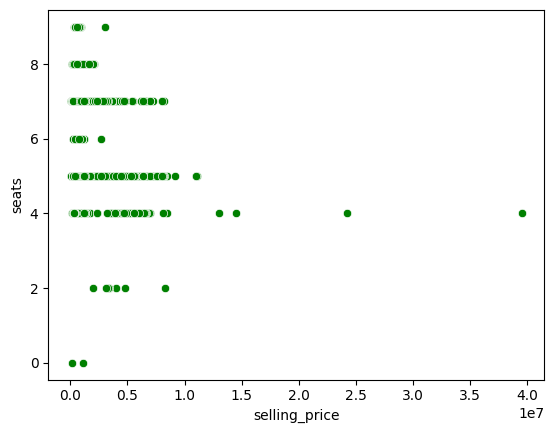

In [32]:

sns.scatterplot(data=data, x='selling_price', y='seats', color='g')

# Show the plot
plt.show()


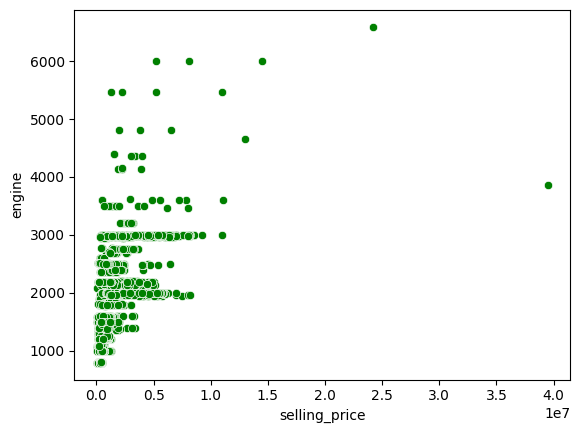

In [33]:

sns.scatterplot(data=data, x='selling_price', y='engine', color='g')

# Show the plot
plt.show()


In [34]:
features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
data[features].corr()


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<Axes: >

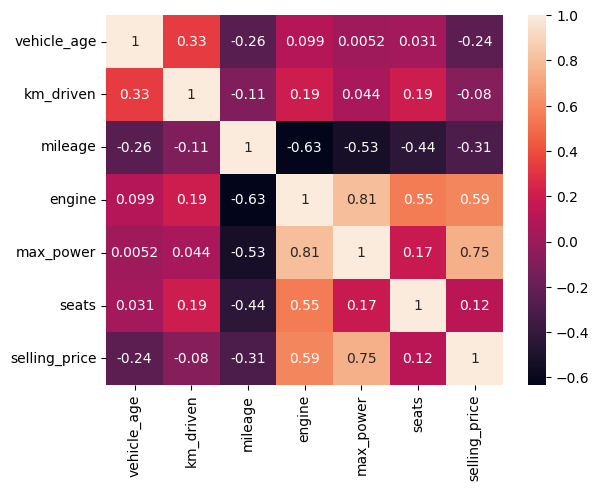

In [35]:
sns.heatmap(data= data[features].corr(),annot = True)

In [36]:
data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [37]:
model_data = data.copy()
model_data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [38]:
model_data.drop(labels = ['car_name','brand','model','seller_type'],axis = 1,inplace = True)
model_data

,Unnamed: 0,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,2,18000,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,6,67000,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,5,3800000,Diesel,Manual,16.00,2179,140.00,7,1225000


In [39]:
model_data = pd.get_dummies(model_data,dtype = float)
model_data

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,19540,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,19541,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,19542,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [40]:
"""Linear regression - Modelling

Y (Target variable) = m1x1 + m2x2 + m3x3 ............

We will drop selling_price from independent variable"""

X = model_data.drop('selling_price', axis = 1)

# For getting the target variable we will just have selling_price

Y = model_data['selling_price']
Y




0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

In [41]:
# To divide the data into Train and Test 

train_X, test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2)

# 80% of the data goes to training and 20% of the data goes to testing


In [42]:
# Applying regression for training the model
Regressor = LinearRegression().fit(train_X,train_Y)


In [43]:
# Getting the predictions
prediction = Regressor.predict(test_X)

print(prediction)

print(test_Y)


[ 462694.18750964  747898.04995927  677350.77558982 ...  742247.23539556
  662692.66332662 1271245.70224471]
4767      535000
13438     315000
3335      911000
2705     1075000
7623      350000
          ...   
10066     475000
12813     286000
8819      540000
6192      579000
4497      720000
Name: selling_price, Length: 3083, dtype: int64


In [49]:
test_X['predicted_sales_price'] = prediction

test_X['Actual_price'] = test_Y

test_X['difference'] = test_X['predicted_sales_price'] - test_X['Actual_price']

test_X

mse = []
mse.append(mean_squared_error(y_true = test_Y,y_pred = prediction))

rmse = []
rmse.append(np.sqrt(mse))

rmse

[array([489658.23011207])]